# The aim of this book is to anlyse the movies dataset and male some inferences in reference to the budgeting 

In [1]:
import pandas as pd

In [2]:
movie_df=pd.read_csv('movies.csv')

In [3]:
movie_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
movie_df.shape

(7668, 15)

In [5]:
movie_df.dropna()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [6]:
movie_df.shape

(7668, 15)

# 1. Data Cleaning: Identify variables that are essential for determining a movie’s commercial success and remove movies that miss these variables. Discuss why you decide to remove missing values for these variables. 


In [8]:
import numpy as np 
import seaborn as sns 

In [9]:
movie_df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


A movies commercial success can be estimated by using a variety of variables. The variables with that determine a movies success include; budget, gross and score. And so, it was important to remove movies without the mentioned variables. Because the success of such movies cannot be measured.

In [11]:
movie_df.dropna(subset = ['gross','budget','score','votes'],inplace=True)

In [12]:
movie_df.shape

(5436, 15)

In [13]:
# question 2a ,point interval for population mean 

In [14]:
movie_df.mean()

C:\Users\Jayd\AppData\Local\Temp/ipykernel_1100/4113260469.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  movie_df.mean()


year       2.001652e+03
score      6.392642e+00
votes      1.149110e+05
budget     3.593864e+07
gross      1.030045e+08
runtime    1.081564e+02
dtype: float64

In [15]:
import matplotlib.pyplot as plt
  

C:\Users\Jayd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


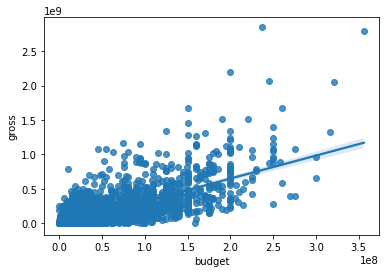

In [16]:
ci = sns.regplot(movie_df['budget'],movie_df['gross'], ci=95)

C:\Users\Jayd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


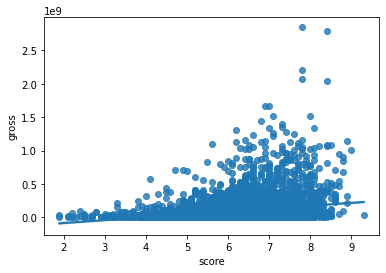

In [17]:
ci = sns.regplot(movie_df['score'],movie_df['gross'], ci=95)

C:\Users\Jayd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


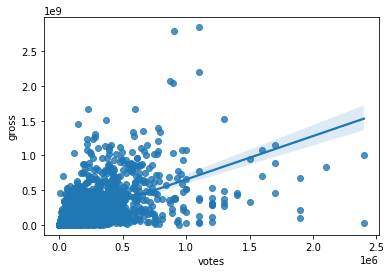

In [18]:
ci = sns.regplot(movie_df['votes'],movie_df['gross'], ci=95)

In [19]:
# question 2b

In [20]:
act=movie_df[movie_df['genre']=='Action']
rat=movie_df[movie_df['rating']=='PG']
new1=pd.concat([act,rat])

In [21]:
new1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
10,Any Which Way You Can,PG,Action,1980,"December 17, 1980 (United States)",6.1,18000.0,Buddy Van Horn,Stanford Sherman,Clint Eastwood,United States,15000000.0,70687344.0,The Malpaso Company,116.0
22,The Final Countdown,PG,Action,1980,"August 1, 1980 (United States)",6.7,22000.0,Don Taylor,Thomas Hunter,Kirk Douglas,United States,12000000.0,16647800.0,Bryna Productions,103.0


In [22]:
new1.describe()

,year,score,votes,budget,gross,runtime
count,2326.000000,2326.000000,2.326000e+03,2.326000e+03,2.326000e+03,2325.000000
mean,2001.067498,6.235340,1.332434e+05,5.279237e+07,1.559435e+08,108.184516
std,11.363560,1.012208,1.977717e+05,5.252742e+07,2.443928e+08,17.545439
min,1980.000000,1.900000,1.950000e+02,7.000000e+03,2.970000e+03,75.000000
25%,1991.000000,5.700000,2.200000e+04,1.600000e+07,1.765383e+07,95.000000
50%,2002.000000,6.300000,6.450000e+04,3.300000e+07,6.256130e+07,105.000000
75%,2011.000000,6.900000,1.620000e+05,7.000000e+07,1.830061e+08,118.000000
max,2020.000000,9.000000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [23]:
print(new1.nunique())

name        2150
rating         5
genre         14
year          41
released    1596
score         67
votes        560
director    1071
writer      1490
star         929
country       32
budget       265
gross       2180
company      619
runtime      104
dtype: int64


In [24]:
new1.mean()

C:\Users\Jayd\AppData\Local\Temp/ipykernel_1100/2329559761.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new1.mean()


year       2.001067e+03
score      6.235340e+00
votes      1.332434e+05
budget     5.279237e+07
gross      1.559435e+08
runtime    1.081845e+02
dtype: float64

In [25]:
# confidence intervals for score ,votess ,budget and gross

In [26]:
import scipy.stats as st

In [27]:
sr=new1['score']

In [28]:
st.norm.interval(alpha=0.95, loc=np.mean(sr), scale=st.sem(sr))

(6.194204484956087, 6.276474792773923)

In [29]:
vs=new1['votes']

In [30]:
st.norm.interval(alpha=0.95, loc=np.mean(vs), scale=st.sem(vs))

(125206.15091697425, 141280.65045877814)

In [31]:
bd=new1['budget']
st.norm.interval(alpha=0.95, loc=np.mean(bd), scale=st.sem(bd))

(50657706.85056082, 54927032.47618037)

In [32]:
gr=new1['gross']
st.norm.interval(alpha=0.95, loc=np.mean(gr), scale=st.sem(gr))

(146011627.05386868, 165875399.23589918)

# 2c the budget and gross variables will be converted into integers and log transformed 

In [34]:
movie_df.budget=movie_df['budget'].astype('int64')
movie_df.gross=movie_df['gross'].astype('int64')

In [35]:
movie_df['log_gross'] = np.log10(movie_df['gross']+1)
movie_df['log_budget'] = np.log10(movie_df['budget']+1)


In [36]:
movie_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,log_gross,log_budget
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,7.672087,7.278754
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,7.769769,6.653213
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,8.731085,7.255273
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,7.921445,6.544068
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,7.600388,6.778151


In [37]:
# question 3

In [38]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline

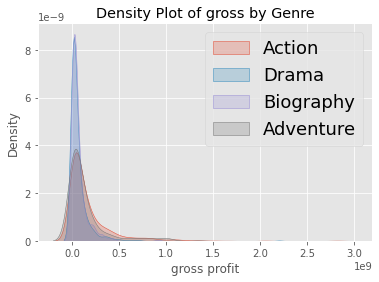

In [39]:
sns.kdeplot(movie_df.loc[movie_df['genre'] == 'Action', 'gross'], label = 'Action', shade = True)
sns.kdeplot(movie_df.loc[movie_df['genre'] == 'Drama', 'gross'], label = 'Drama', shade = True)
sns.kdeplot(movie_df.loc[movie_df['genre'] == 'Biography', 'gross'], label = 'Biography', shade = True)
sns.kdeplot(movie_df.loc[movie_df['genre'] == 'comedy', 'gross'], label = 'Comedy', shade = True)
sns.kdeplot(movie_df.loc[movie_df['genre'] == 'Adventure', 'gross'], label = 'Adventure', shade = True)




plt.xlabel('gross profit'); plt.ylabel('Density'); plt.title('Density Plot of gross by Genre');plt.legend(fontsize=18);

In [40]:
director = (movie_df.director.str.split('|', expand=True)
            .stack()
            .to_frame(name='director'))


director.index = director.index.droplevel(1)



<AxesSubplot:xlabel='director'>

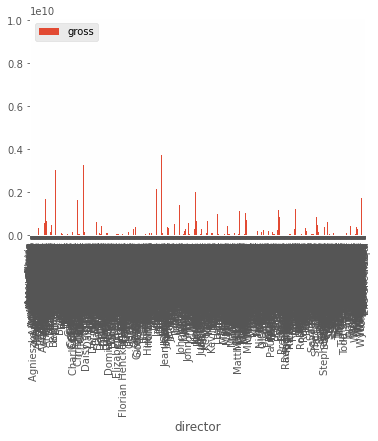

In [41]:
(director.join(movie_df['gross'])
       .groupby('director')
       .sum()
       .plot(kind='bar'))


In [42]:
# question 4

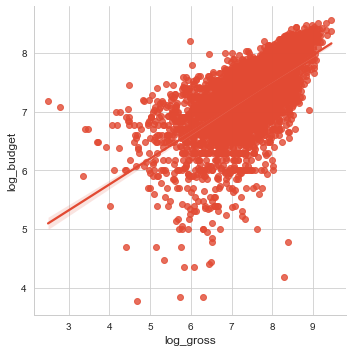

In [43]:
sns.set_style('whitegrid')
sns.lmplot(x ='log_gross', y ='log_budget', data = movie_df)

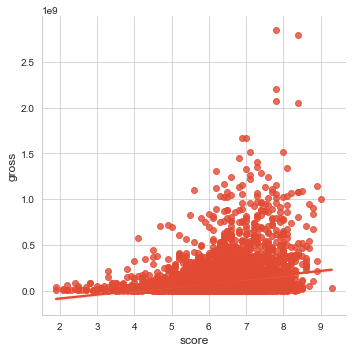

In [44]:
sns.set_style('whitegrid')
sns.lmplot(x ='score', y ='gross', data = movie_df)

In [45]:
# question 5

In [46]:
new2=movie_df.loc[(movie_df['year'] >= 2003) &
(movie_df['company'].str.contains('Marvel')),]

In [47]:
new2.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,log_gross,log_budget
4269,Daredevil,PG-13,Action,2003,"February 14, 2003 (United States)",5.3,209000.0,Mark Steven Johnson,Mark Steven Johnson,Ben Affleck,United States,78000000,179179718,Marvel Enterprises,103.0,8.253289,7.892095
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,9.181505,8.342423
6244,Iron Man 3,PG-13,Action,2013,"May 3, 2013 (United States)",7.1,779000.0,Shane Black,Drew Pearce,Robert Downey Jr.,United States,200000000,1214811252,Marvel Studios,130.0,9.084509,8.301030
6247,Thor: The Dark World,PG-13,Action,2013,"November 8, 2013 (United States)",6.8,618000.0,Alan Taylor,Christopher L. Yost,Chris Hemsworth,United States,170000000,644783140,Marvel Studios,112.0,8.809414,8.230449
6443,Guardians of the Galaxy,PG-13,Action,2014,"August 1, 2014 (United States)",8.0,1100000.0,James Gunn,James Gunn,Chris Pratt,United States,170000000,773350147,Marvel Studios,121.0,8.888376,8.230449
6448,Captain America: The Winter Soldier,PG-13,Action,2014,"April 4, 2014 (United States)",7.7,764000.0,Anthony Russo,Christopher Markus,Chris Evans,United States,170000000,714421503,Marvel Entertainment,136.0,8.853955,8.230449
6478,The Amazing Spider-Man 2,PG-13,Action,2014,"May 2, 2014 (United States)",6.6,427000.0,Marc Webb,Alex Kurtzman,Andrew Garfield,United States,200000000,708982323,Marvel Enterprises,142.0,8.850635,8.301030
6644,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",7.3,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000,1402809540,Marvel Studios,141.0,9.146999,8.397940
6846,Captain America: Civil War,PG-13,Action,2016,"May 6, 2016 (United States)",7.8,694000.0,Anthony Russo,Christopher Markus,Chris Evans,United States,250000000,1153337496,Marvel Studios,147.0,9.061956,8.397940
6849,Doctor Strange,PG-13,Action,2016,"November 4, 2016 (United States)",7.5,628000.0,Scott Derrickson,Jon Spaihts,Benedict Cumberbatch,United States,165000000,677796076,Marvel Studios,115.0,8.831099,8.217484


In [48]:
new2.mean()

C:\Users\Jayd\AppData\Local\Temp/ipykernel_1100/1320917887.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new2.mean()


year          2.014667e+03
score         7.386667e+00
votes         7.124000e+05
budget        2.074667e+08
gross         1.111212e+09
runtime       1.338667e+02
log_gross     8.972008e+00
log_budget    8.294055e+00
dtype: float64

In [49]:
dare=new2[new2['name']=='Daredevil']

In [50]:
bud=dare['budget'].mean()
gro=dare['gross'].mean()
com_suc=gro/bud
print(com_suc)

2.2971758717948716


In [51]:
bud2=new2['budget'].mean()
gro=new2['gross'].mean()
com_suc=gro/bud
print(com_suc)


14.246304235042734


In [52]:
# Question 6

In [53]:
import statsmodels.api as sm


In [54]:
X = movie_df[["log_budget","votes","score"]]
y = movie_df["log_gross"]

In [55]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_gross   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          3.068e+05
Date:                Mon, 02 May 2022   Prob (F-statistic):                        0.00
Time:                        12:33:19   Log-Likelihood:                         -4713.0
No. Observations:                5436   AIC:                                      9432.
Df Residuals:                    5433   BIC:                                      9452.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
log_budget     0.9330      0.007    142.845      0.000       0.920       0.946
votes       1.072e-06   4.51e-08     23.742      0.000    9.83e-07    1.16e-06
score          0.0854      0.008     11.238      0.000       0.070       0.100
==============================================================================
Omnibus:                     1219.963   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5601.024
Skew:                          -1.017   Prob(JB):                         0.00
Kurtosis:                       7.538   Cond. No.                     2.77e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Time Series Analysis 

In [57]:
new3 = movie_df.sort_values(by=['genre','released'])

In [58]:
new3.describe()

,year,score,votes,budget,gross,runtime,log_gross,log_budget
count,5436.000000,5436.000000,5.436000e+03,5.436000e+03,5.436000e+03,5435.000000,5436.000000,5436.000000
mean,2001.651582,6.392642,1.149110e+05,3.593864e+07,1.030045e+08,108.156394,7.471350,7.287546
std,10.541791,0.963200,1.842255e+05,4.154770e+07,1.871051e+08,18.121401,0.824394,0.553949
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000,2.491362,3.778224
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.067412e+07,95.000000,7.028332,7.000000
50%,2002.000000,6.500000,5.200000e+04,2.100000e+07,3.671199e+07,105.000000,7.564808,7.322219
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.119478e+08,118.000000,8.049016,7.653213
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000,9.454425,8.551450


In [60]:
forecast_df=new3.groupby("year").agg(score_sum=pd.NamedAgg(column="score", aggfunc="sum"),votes_sum=pd.NamedAgg(column="votes", aggfunc="sum"),budget_sum=pd.NamedAgg(column="budget", aggfunc="sum"),gross_sum=pd.NamedAgg(column="gross", aggfunc="sum")).reset_index()

In [61]:
forecast_df.head()

,year,score_sum,votes_sum,budget_sum,gross_sum
0,1980,260.4,3795865.0,462650000,1771678547
1,1981,398.7,2699432.0,692900000,1838757418
2,1982,460.3,3999721.0,835475000,2701119069
3,1983,503.6,3714135.0,887699000,2321449113
4,1984,577.3,5514764.0,1110826000,3000742994


In [62]:
from sklearn.linear_model import LinearRegresion

In [64]:
train =forecast_df[forecast_df['year']< 2020]
test =forecast_df[forecast_df['year']== 2020]

In [65]:
X = train[['year']]
y = train['gross_sum']

In [67]:
lm = LinearRegression()
model = lm.fit(X, y)
print(f'alpha = {model.intercept_}')
print(f'beta = {model.coef_}')

alpha = -1523494693834.0898
beta = [7.68910316e+08]


In [75]:
X =[[2020]]
pred_val= model.predict(X)
print(pred_val)

[2.97041448e+10]


In [76]:
true_val=test['gross_sum']
print(true_val)

40    2272901821
Name: gross_sum, dtype: int64


In [73]:
loss= pred_val-true_val

In [74]:
print(loss)

40    2.743124e+10
Name: gross_sum, dtype: float64
